In [29]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
from scipy import signal
from scipy import integrate
from scipy import ndimage
plt.style.use('cashaback_dark')
from tqdm import tqdm

import scipy.special as sc

In [30]:
def simulate_conditioned_distribution(mu_x, sigma_x, mu_y, sigma_y, n_samples=1000000):
    # Generate random variables X and Y
    x = np.random.normal(mu_x, sigma_x, size=n_samples)
    y = np.random.normal(mu_y, sigma_y, size=n_samples)
    
    # Compute the values of X that are less than Y
    x_conditioned = x[x < y]
    
    # Compute the sample mean of the new distribution
    if len(x_conditioned) > 0:
        new_mu = np.mean(x_conditioned)
        new_sd = np.std(x_conditioned)
        new_skew = stats.skew(x_conditioned)
    else:
        new_mu = 0
        
    return x,y,x_conditioned,new_mu,new_sd,new_skew

In [31]:
def get_skew(EX,EX2,EX3):
    ans = (EX3 - 3*EX*(EX2 - EX**2) - EX**3)/((EX2 - EX**2)**(3/2))
    return ans

943.5810416452244
82.56452711765583
-0.16267521277397373
943.6191876298298
82.60313505608977
-0.13525520812168396


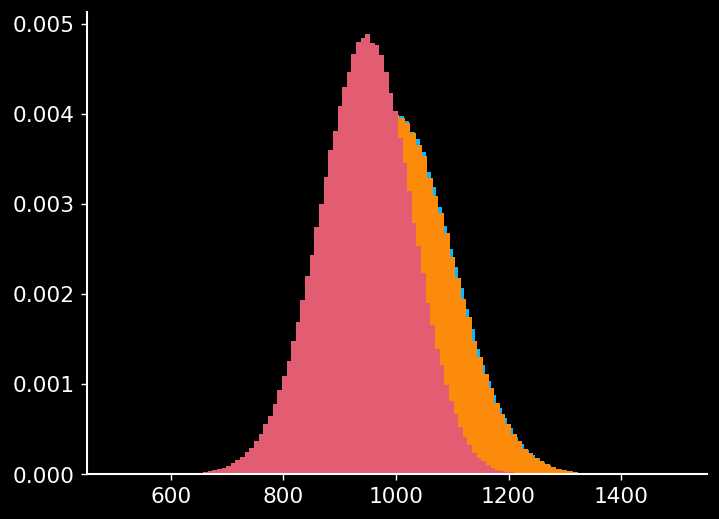

In [32]:
mu_x = 1000
sigma_x = 100
mu_y = 1000
sigma_y = 100
timesteps = np.arange(-5000,5000,1)
xpdf = stats.norm.pdf(timesteps,mu_x,sigma_x)
prob_x_less_y = stats.norm.cdf(0,mu_x-mu_y,np.sqrt(sigma_x**2 + sigma_y**2))

y_integrated = (sc.erfc((timesteps-mu_y)/(np.sqrt(2)*sigma_y)))/2
ev = np.sum(timesteps*xpdf*y_integrated)/prob_x_less_y
ev2 = np.sum(timesteps**2*xpdf*y_integrated)/prob_x_less_y
ev3 = np.sum(timesteps**3*xpdf*y_integrated)/prob_x_less_y

std = np.sqrt(ev2 - ev**2)
skew = get_skew(ev,ev2,ev3)
print(ev)
print(std)
print(skew)


x,y,x_conditioned,new_mu,new_sd,new_skew = simulate_conditioned_distribution(mu_x, sigma_x, mu_y, sigma_y)
print(new_mu)
print(new_sd)
print(new_skew)
fig,ax = plt.subplots()
ax.hist(x,density=True,bins=100)
ax.hist(y,density=True,bins=100)
ax.hist(x_conditioned,density=True,bins=100)
plt.show()

# Going the Opposite Way

In [33]:
def simulate_conditioned_distribution_reverse(mu_x, sigma_x, mu_y, sigma_y, n_samples=1000000):
    # Generate random variables X and Y
    x = np.random.normal(mu_x, sigma_x, size=n_samples)
    y = np.random.normal(mu_y, sigma_y, size=n_samples)
    
    # Compute the values of X that are less than Y
    x_conditioned = x[x > y]
    
    # Compute the sample mean of the new distribution
    if len(x_conditioned) > 0:
        new_mu = np.mean(x_conditioned)
        new_sd = np.std(x_conditioned)
        new_skew = stats.skew(x_conditioned)
    else:
        new_mu = 0
        
    return x,y,x_conditioned,new_mu,new_sd,new_skew

In [34]:
def get_skew(EX,EX2,EX3):
    ans = (EX3 - 3*EX*(EX2 - EX**2) - EX**3)/((EX2 - EX**2)**(3/2))
    return ans

1017.8412411615277
46.70856574351533
0.023656557896989266
1017.8813711582973
46.75624014011184
0.034589908966948794


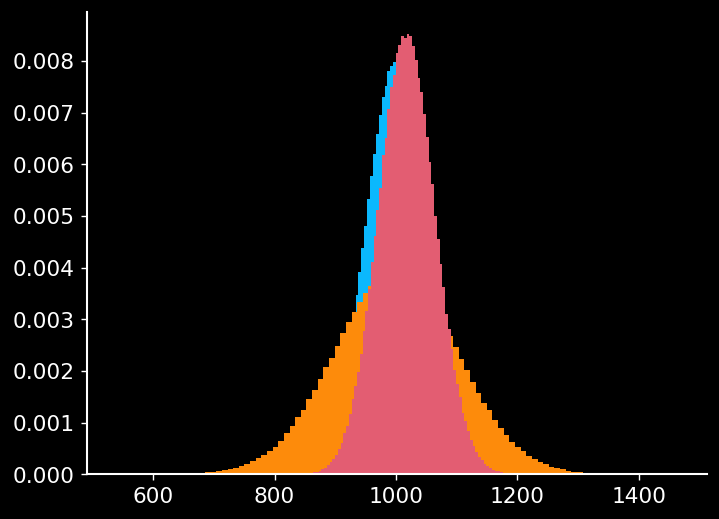

In [36]:
mu_x = 1000
sigma_x = 50
mu_y = 1000
sigma_y = 100
timesteps = np.arange(-5000,5000,1)
xpdf = stats.norm.pdf(timesteps,mu_x,sigma_x)
prob_x_less_y = 1 - stats.norm.cdf(0,mu_x-mu_y,np.sqrt(sigma_x**2 + sigma_y**2))

y_integrated = (sc.erfc((mu_y - timesteps)/(np.sqrt(2)*sigma_y)))/2
ev = np.sum(timesteps*xpdf*y_integrated)/prob_x_less_y
ev2 = np.sum((timesteps**2)*xpdf*y_integrated)/prob_x_less_y
ev3 = np.sum((timesteps**3)*xpdf*y_integrated)/prob_x_less_y

std = np.sqrt(ev2 - ev**2)
skew = get_skew(ev,ev2,ev3)
print(ev)
print(std)
print(skew)


x,y,x_conditioned,new_mu,new_sd,new_skew = simulate_conditioned_distribution_reverse(mu_x, sigma_x, mu_y, sigma_y)
print(new_mu)
print(new_sd)
print(new_skew)
fig,ax = plt.subplots()
ax.hist(x,density=True,bins=100)
ax.hist(y,density=True,bins=100)
ax.hist(x_conditioned,density=True,bins=100)
plt.show()